In [1]:
%pip install odc-stac
%pip install stackstac

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [2]:
# coding: utf-8

"""
https://pystac-client.readthedocs.io/en/stable/quickstart.html
https://github.com/Element84/earth-search


"""

import os

import pystac_client
import rioxarray
import stackstac
from pystac_client import Client

In [3]:
os.environ["AWS_REQUEST_PAYER"] = "requester"
os.environ["AWS_PROFILE"] = "akpetty"

In [4]:
# Weiji example

client = Client.open(url="https://earth-search.aws.element84.com/v1/")
search = client.search(
    collections="sentinel-2-l1c",
    bbox=[-20.7, 64.5, -19.5, 64.8],  # xmin, ymin, xmax, ymax
    datetime="2023-02-01/2023-02-28",
)
stac_items = search.items()
stac_item = next(stac_items)  # <Item id=S2B_27WWM_20230228_0_L1C>

for stac_asset in stac_item.assets.values():
    stac_asset.href = stac_asset.href.replace(
        "s3://sentinel-s2-l2a/", "s3://sentinel-s2-l1c/"
    )
    

In [5]:
dataarray = stackstac.stack(items=stac_item, dtype="float16", resolution=10)
print(dataarray)

<xarray.DataArray 'stackstac-c5ebf87251b169805e8e855112a1a7e8' (time: 1,
                                                                band: 14,
                                                                y: 10980,
                                                                x: 10980)>
dask.array<fetch_raster_window, shape=(1, 14, 10980, 10980), dtype=float16, chunksize=(1, 1, 1024, 1024), chunktype=numpy.ndarray>
Coordinates: (12/39)
  * time                              (time) datetime64[ns] 2023-02-28T13:03:...
    id                                (time) <U24 'S2B_27WWM_20230228_0_L1C'
  * band                              (band) <U8 'blue' 'cirrus' ... 'visual'
  * x                                 (x) float64 5e+05 5e+05 ... 6.098e+05
  * y                                 (y) float64 7.2e+06 7.2e+06 ... 7.09e+06
    mgrs:utm_zone                     int64 27
    ...                                ...
    gsd                               (band) object 10 60 60 10 ... 20 

/srv/conda/envs/notebook/lib/python3.10/site-packages/stackstac/accumulate_metadata.py:168: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  np.array(


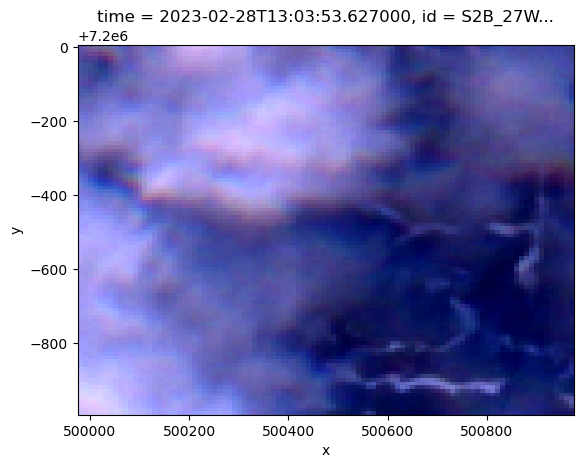

In [6]:

da_rgb = dataarray.sel(band=["red", "green", "blue"]).squeeze()[:, :100, :100]  # get subset
da_rgb.astype("int").plot.imshow(rgb="band", robust=True)

In [7]:


client = Client.open("https://earth-search.aws.element84.com/v1")

#'S2A_39GWH_20230607_0_L1C'

#ids='L1C_T43XEM_A026475_20220401T110616'
#S2B_MSIL1C_20220401T110619_N0400_R137_T43XEM_20220401T121458

In [8]:
my_search = client.search(
    max_items=10,
    collections=['sentinel-2-l1c'],
    ids='S2A_39GWH_20230607_0_L1C')
print(f"{my_search.matched()} items found")

1 items found


In [9]:
stac_items = my_search.items()
stac_item = next(stac_items)  # <Item id=S2B_27WWM_20230228_0_L1C>

for stac_asset in stac_item.assets.values():
    stac_asset.href = stac_asset.href.replace(
        "s3://sentinel-s2-l2a/", "s3://sentinel-s2-l1c/"
    )


In [10]:
dataarray = stackstac.stack(items=stac_item, dtype="float16", resolution=10)

/srv/conda/envs/notebook/lib/python3.10/site-packages/stackstac/accumulate_metadata.py:168: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  np.array(


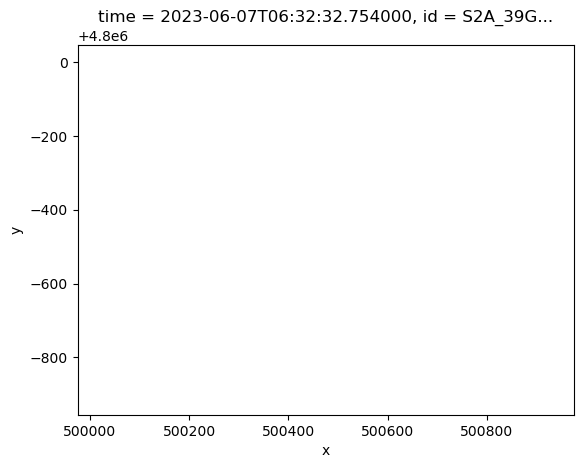

In [11]:
da_rgb = dataarray.sel(band=["red", "green", "blue"]).squeeze()[:, :100, :100]  # get subset
da_rgb.astype("int").plot.imshow(rgb="band", robust=True)


#new_string = S2_items[0]['assets']['red']['href'].replace("l2a", "l1c" )
#new_string

In [12]:
da_rgb

<xarray.DataArray 'stackstac-40cde5047a24866c598f8ac85104b610' (band: 3,
                                                                y: 100, x: 100)>
dask.array<getitem, shape=(3, 100, 100), dtype=float16, chunksize=(1, 100, 100), chunktype=numpy.ndarray>
Coordinates: (12/39)
    time                              datetime64[ns] 2023-06-07T06:32:32.754000
    id                                <U24 'S2A_39GWH_20230607_0_L1C'
  * band                              (band) <U8 'red' 'green' 'blue'
  * x                                 (x) float64 5e+05 5e+05 ... 5.01e+05
  * y                                 (y) float64 4.8e+06 4.8e+06 ... 4.799e+06
    mgrs:utm_zone                     int64 39
    ...                                ...
    gsd                               (band) object 10 10 10
    title                             (band) <U30 'Red (band 4) - 10m' ... 'B...
    common_name                       (band) object 'red' 'green' 'blue'
    center_wavelength                 (band) object 0.665 0.56 0.49
    full_width_half_max               (band) object 0.038 0.045 0.098
    epsg                              int64 32739
Attributes:
    spec:        RasterSpec(epsg=32739, bounds=(499980, 4690240, 609780, 4800...
    crs:         epsg:32739
    transform:   | 10.00, 0.00, 499980.00|\n| 0.00,-10.00, 4800040.00|\n| 0.0...
    resolution:  10

In [13]:
import rasterio
with rasterio.open(stac_asset['assets']['red']['href']) as dataset:
    rasterio.plot.show(dataset)

TypeError: 'Asset' object is not subscriptable

In [ ]:
cfg = {
    "sentinel-2-l2a": {
        "assets": {
            "*": {"data_type": "uint16", "nodata": 0},
            "SCL": {"data_type": "uint8", "nodata": 0},
            "visual": {"data_type": "uint8", "nodata": 0},
        },
    },
    "*": {"warnings": "ignore"},
}
resolution = 10

In [ ]:
xx = stac_load(
    S2_items,
    bands=["red", "green", "blue", "nir", "SCL"],
    resolution=resolution,
    chunks={"x": 2048, "y": 2048},
    stac_cfg=cfg,
)

print(f"Bands: {','.join(list(xx.data_vars))}")
display(xx)

In [ ]:
xx = stac_load(
    S2_items[0],
    bands=["red", "green", "blue"],
    resolution=100,
)
xx.red.plot.imshow(col="time")

In [ ]:



#S2_items = [i.to_dict() for i in my_search.get_items()]
#print(f"{len(S2_items)} S2 scenes fetched")

#for item in S2_items:
#    red_href = item['assets']['red']['href']
    #red_s3 = item['assets']['red']['alternate']['s3']['href']
#    print(red_href)    
    #print(red_s3)
    
    